### try: for report (use all training data)-- [9hrs, 5hrs] x [all, PM2.5]  |   then try 5hr (PM2.5 + rain_sum)

In [1]:
# linear regression，方法限定使用Gradient Descent, 只能使用numpy、scipy以及pandas, numpy.linalg.lstsq是不可以用
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# numpy.version.version: 1.13.1

In [2]:
# import sys
import csv

# 18 categories in total
AMB_TEMP = []
CH4 = []
CO = []
NMHC = []
NO = []
NO2 = []
NOx = []
O3 = []
PM10 = []
PM2_5 = []
RAINFALL = []
RH = []
SO2 = []
THC = []
WD_HR = []
WIND_DIREC = []
WIND_SPEED = []
WS_HR = []

# with open(sys.argv[1]) as f:
with open('train.csv', 'rt', encoding='big5') as csvfile:
    spamreader = csv.reader(csvfile, delimiter='\n')
    row1 = next(spamreader) # skip headings
    counter = 0
    for idx, row in enumerate(spamreader): # idx starts with 0
        row = row[0].split(',')
        values = row[3:] # remove 日期、測站、測項
        values = [float(i) if i != 'NR' else 0.0 for i in values]
        # values is now sth like
        # [14.0, 14.0, 14.0, 13.0, 12.0, 12.0, 12.0, 12.0, 15.0,17.0, 20.0, 22.0,
        #  22.0, 22.0, 22.0, 22.0, 21.0, 19.0, 17.0, 16.0, 15.0, 15.0, 15.0, 15.0]
        category_num = counter % 18
        if category_num == 0:
            AMB_TEMP += values
        elif category_num == 1:
            CH4 += values
        elif category_num == 2:
            CO += values
        elif category_num == 3:
            NMHC += values
        elif category_num == 4:
            NO += values
        elif category_num == 5:
            NO2 += values
        elif category_num == 6:
            NOx += values
        elif category_num == 7:
            O3 += values
        elif category_num == 8:
            PM10 += values
        elif category_num == 9:
            PM2_5 += values
        elif category_num == 10:
            RAINFALL += values
        elif category_num == 11:
            RH += values
        elif category_num == 12:
            SO2 += values
        elif category_num == 13:
            THC += values
        elif category_num == 14:
            WD_HR += values
        elif category_num == 15:
            WIND_DIREC += values
        elif category_num == 16:
            WIND_SPEED += values
        elif category_num == 17:
            WS_HR += values
        # print(category_num, idx, values)
        counter += 1

## All features

### 9hr

In [193]:
window = 9
lr = 0.00001
batch = 20
weights = np.zeros(window * 18 + 1) # better way to initialize (maybe random)?
errors = []
# print(len(PM2_5)) # 5760 pieces of data, ~200 updates for each epoch with batch = 30
train_input = []
train_output = []
for epoch in range(0,300):
    # min=41
    # lr = 10^-5
    # 300 epochs: 67       (batch20)63
    # 150 epochs: 80
    # 100 epochs: (batch30)90    (batch20)80     (batch40)100
    # 70 epochs: 100
    # 50 epochs: 110
    # 40 epochs: 120
    # 30 epochs: (batch50)150   (batch40)120     (batch30)120    (batch20)100    (batch10)260
    # lr = 10^-6
    # 30 epochs: 150
    # lr = 10^-7
    # 30 epochs: 210
    # lr = 10^-8
    # 30 epochs: 260
    # 20 epochs: 300
    # 15 epochs: 340
    # 10 epochs: 400
    for month in range(0,12):
        for hour in range(97, 24 * 20): # skipping the first 96 (dev) hours of each month
            idx = month * 24 * 20 + hour
            if idx + window > len(PM2_5) - 1:
                break
            error = 0
            gradients = 0
            features = np.array(AMB_TEMP[idx: idx+window] + CH4[idx: idx+window] + CO[idx: idx+window] +
                        NMHC[idx: idx+window] + NO[idx: idx+window] + NO2[idx: idx+window] +
                        NOx[idx: idx+window] + O3[idx: idx+window] + PM10[idx: idx+window] +
                        PM2_5[idx: idx+window] + RAINFALL[idx: idx+window] + RH[idx: idx+window] +
                        SO2[idx: idx+window] + THC[idx: idx+window] + WD_HR[idx: idx+window] +
                        WIND_DIREC[idx: idx+window] + WIND_SPEED[idx: idx+window] + WS_HR[idx: idx+window] + [1] )
            
            # better way to write this?
            prediction = sum(np.multiply(weights, features))
            # print('prediction', prediction)
            answer = PM2_5[idx+window]
            # print('answer', answer)
            
            if epoch == 0:
                train_input.append(features)
                train_output.append(answer)
            
            error += (answer - prediction)**2
            gradients += -2 * (answer - prediction) * features # this works because for b, there is -1
            # print(gradients)
            if idx % batch == 6: # first batch will have extra 1 data
                weights = weights - lr * gradients / batch
                errors.append(error / batch)
                # print('error', error / batch)
                error = 0
                gradients = 0
                
test_errors = []
test_input = []
test_output = []
for month in range(0,12):
    for hour in range(0,96):
        idx = month * 24 * 20 + hour
        features = np.array(AMB_TEMP[idx: idx+window] + CH4[idx: idx+window] + CO[idx: idx+window] +
                    NMHC[idx: idx+window] + NO[idx: idx+window] + NO2[idx: idx+window] +
                    NOx[idx: idx+window] + O3[idx: idx+window] + PM10[idx: idx+window] +
                    PM2_5[idx: idx+window] + RAINFALL[idx: idx+window] + RH[idx: idx+window] +
                    SO2[idx: idx+window] + THC[idx: idx+window] + WD_HR[idx: idx+window] +
                    WIND_DIREC[idx: idx+window] + WIND_SPEED[idx: idx+window] + WS_HR[idx: idx+window] + [1] )
        test_input.append(features)
        
        prediction = sum(np.multiply(weights, features))
        
        answer = PM2_5[idx+window]
        test_output.append(answer)
        
        error = (answer - prediction)**2
        test_errors.append(error)
        
best_train_weights = np.linalg.lstsq(train_input, train_output)[0]
best_train_predictions = np.dot(train_input, best_train_weights)
best_train_errors = (train_output - best_train_predictions) ** 2

train_predictions = np.dot(train_input, weights)
train_errors = (train_output - train_predictions) ** 2

# best_weights = np.linalg.lstsq(test_input, test_output)[0]
best_predictions = np.dot(test_input, best_train_weights)
best_errors = (test_output - best_predictions) ** 2

print('average test error', np.average(test_errors))
print('best average test error', np.average(best_errors))
print('average train error', np.average(train_errors))
print('best average train error', np.average(best_train_errors))

average test error 62.7319910117
best average test error 41.8418657759
average train error 57.2568151555
best average train error 31.9914021499


### 5hr

In [192]:
window = 5
lr = 0.00001
batch = 30
weights = np.zeros(window * 18 + 1) # better way to initialize (maybe random)?
errors = []
# print(len(PM2_5)) # 5760 pieces of data, ~200 updates for each epoch with batch = 30
train_input = []
train_output = []
for epoch in range(0,300):
    # min=41, (default = batch30)
    # lr = 10^-5
    # 300 epochs: 67->56.1       (batch20)63->62
    # 150 epochs: 80
    # 100 epochs: (batch30)90->63.1    (batch20)80->70.5     (batch40)100
    # 70 epochs: 100
    # 50 epochs: 110
    # 40 epochs: 120
    # 30 epochs: (batch50)150   (batch40)120->108     (batch30)120->81    (batch20)100->98    (batch10)260
    # lr = 10^-6
    # 30 epochs: 150
    # lr = 10^-7
    # 30 epochs: 210
    # lr = 10^-8
    # 30 epochs: 260
    # 20 epochs: 300
    # 15 epochs: 340
    # 10 epochs: 400
    for month in range(0,12):
        for hour in range(97, 24 * 20): # skipping the first 96 (dev) hours of each month
            idx = month * 24 * 20 + hour
            if idx + window > len(PM2_5) - 1:
                break
            error = 0
            gradients = 0
            features = np.array(AMB_TEMP[idx: idx+window] + CH4[idx: idx+window] + CO[idx: idx+window] +
                        NMHC[idx: idx+window] + NO[idx: idx+window] + NO2[idx: idx+window] +
                        NOx[idx: idx+window] + O3[idx: idx+window] + PM10[idx: idx+window] +
                        PM2_5[idx: idx+window] + RAINFALL[idx: idx+window] + RH[idx: idx+window] +
                        SO2[idx: idx+window] + THC[idx: idx+window] + WD_HR[idx: idx+window] +
                        WIND_DIREC[idx: idx+window] + WIND_SPEED[idx: idx+window] + WS_HR[idx: idx+window] + [1] )
            
            # better way to write this?
            prediction = sum(np.multiply(weights, features))
            # print('prediction', prediction)
            answer = PM2_5[idx+window]
            # print('answer', answer)
            
            if epoch == 0:
                train_input.append(features)
                train_output.append(answer)
            
            error += (answer - prediction)**2
            gradients += -2 * (answer - prediction) * features # this works because for b, there is -1
            # print(gradients)
            if idx % batch == 6: # first batch will have extra 1 data
                weights = weights - lr * gradients / batch
                errors.append(error / batch)
                # print('error', error / batch)
                error = 0
                gradients = 0
                
test_errors = []
test_input = []
test_output = []
for month in range(0,12):
    for hour in range(0,96):
        idx = month * 24 * 20 + hour
        features = np.array(AMB_TEMP[idx: idx+window] + CH4[idx: idx+window] + CO[idx: idx+window] +
                    NMHC[idx: idx+window] + NO[idx: idx+window] + NO2[idx: idx+window] +
                    NOx[idx: idx+window] + O3[idx: idx+window] + PM10[idx: idx+window] +
                    PM2_5[idx: idx+window] + RAINFALL[idx: idx+window] + RH[idx: idx+window] +
                    SO2[idx: idx+window] + THC[idx: idx+window] + WD_HR[idx: idx+window] +
                    WIND_DIREC[idx: idx+window] + WIND_SPEED[idx: idx+window] + WS_HR[idx: idx+window] + [1] )
        test_input.append(features)
        
        prediction = sum(np.multiply(weights, features))
        
        answer = PM2_5[idx+window]
        test_output.append(answer)
        
        error = (answer - prediction)**2
        test_errors.append(error)
        
best_train_weights = np.linalg.lstsq(train_input, train_output)[0]
best_train_predictions = np.dot(train_input, best_train_weights)
best_train_errors = (train_output - best_train_predictions) ** 2

train_predictions = np.dot(train_input, weights)
train_errors = (train_output - train_predictions) ** 2

# best_weights = np.linalg.lstsq(test_input, test_output)[0]
best_predictions = np.dot(test_input, best_train_weights)
best_errors = (test_output - best_predictions) ** 2

print('average test error', np.average(test_errors))
print('best average test error', np.average(best_errors))
print('average train error', np.average(train_errors))
print('best average train error', np.average(best_train_errors))

average test error 56.1190085347
best average test error 41.617105073
average train error 50.6093814074
best average train error 33.4592214599


## Only PM2_5 feature

### 9hr

In [190]:
window = 9
lr = 0.0001
batch = 10
weights = np.zeros(window + 1) # better way to initialize (maybe random)?
errors = []
# print(len(PM2_5)) # 5760 pieces of data, ~200 updates for each epoch with batch = 30
train_input = []
train_output = []
for epoch in range(0,50): # seems to have already converged by 3rd epoch
    # min=44
    # lr = 10^-4，再調低，還是很難低於 48
    # epoch50: (batch10)47.6    epoch30: (batch10)48   (batch20)52  (batch30)56   (batch40)62
    # lr = 10^-5
    # epoch30: 73
    for month in range(0,12):
        for hour in range(97, 24 * 20): # skipping the first 96 (dev) hours of each month
            idx = month * 24 * 20 + hour
            if idx + window > len(PM2_5) - 1:
                break
            error = 0
            gradients = 0
            features = np.array(PM2_5[idx: idx+window] + [1] )
            
            # better way to write this?
            prediction = sum(np.multiply(weights, features))
            # print('prediction', prediction)
            answer = PM2_5[idx+window]
            # print('answer', answer)
            
            if epoch == 0:
                train_input.append(features)
                train_output.append(answer)
            
            error += (answer - prediction)**2
            gradients += -2 * (answer - prediction) * features # this works because for b, there is -1
            # print(gradients)
            if idx % batch == 6: # first batch will have extra 1 data
                weights = weights - lr * gradients / batch
                errors.append(error / batch)
                # print('error', error / batch)
                error = 0
                gradients = 0
                
test_errors = []
test_input = []
test_output = []
for month in range(0,12):
    for hour in range(0,96):
        idx = month * 24 * 20 + hour
        features = np.array(PM2_5[idx: idx+window] + [1] )
        test_input.append(features)
        
        prediction = sum(np.multiply(weights, features))
        
        answer = PM2_5[idx+window]
        test_output.append(answer)
        
        error = (answer - prediction)**2
        test_errors.append(error)
        
best_train_weights = np.linalg.lstsq(train_input, train_output)[0]
best_train_predictions = np.dot(train_input, best_train_weights)
best_train_errors = (train_output - best_train_predictions) ** 2

train_predictions = np.dot(train_input, weights)
train_errors = (train_output - train_predictions) ** 2

# best_weights = np.linalg.lstsq(test_input, test_output)[0]
best_predictions = np.dot(test_input, best_train_weights)
best_errors = (test_output - best_predictions) ** 2

print('average test error', np.average(test_errors))
print('best average test error', np.average(best_errors))
print('average train error', np.average(train_errors))
print('best average train error', np.average(best_train_errors))

average test error 47.6686057357
best average test error 43.6627082838
average train error 39.0976201455
best average train error 37.4491128514


### 5hr

In [198]:
window = 5 # (6)46.89, min=44.86 (5)46.12, min=44.57 (4)46.15, min=45.7 (3)55.48, min=52.47
lr = 0.0001
batch = 10
weights = np.zeros(window + 1) # better way to initialize (maybe random)?
errors = []
# print(len(PM2_5)) # 5760 pieces of data, ~200 updates for each epoch with batch = 30
train_input = []
train_output = []
for epoch in range(0,200):
    # min=44.5
    # lr = 10^-4
    # epoch200: (batch10)???->46.1
    # epoch100: (batch10)???->46.5    (batch20)???->47.5
    # epoch50: (batch10)47.6->46.8    (batch20)???->49.56
    # epoch30: (batch10)48   (batch20)52  (batch30)56   (batch40)62
    # lr = 10^-5
    # epoch30: 73
    for month in range(0,12):
        for hour in range(97, 24 * 20): # skipping the first 96 (dev) hours of each month
            idx = month * 24 * 20 + hour
            if idx + window > len(PM2_5) - 1:
                break
            error = 0
            gradients = 0
            features = np.array(PM2_5[idx: idx+window] + [1] )
            
            # better way to write this?
            prediction = sum(np.multiply(weights, features))
            # print('prediction', prediction)
            answer = PM2_5[idx+window]
            # print('answer', answer)
            
            if epoch == 0:
                train_input.append(features)
                train_output.append(answer)
            
            error += (answer - prediction)**2
            
            gradients += -2 * (answer - prediction) * features # this works because for b, there is -1
            # print(gradients)
            if idx % batch == 6: # first batch will have extra 1 data
                weights = weights - lr * gradients / batch
                errors.append(error / batch)
                # print('error', error / batch)
                error = 0
                gradients = 0
                
test_errors = []
test_input = []
test_output = []
for month in range(0,12):
    for hour in range(0,96):
        idx = month * 24 * 20 + hour
        features = np.array(PM2_5[idx: idx+window] + [1] )
        test_input.append(features)
        
        prediction = sum(np.multiply(weights, features))
        
        answer = PM2_5[idx+window]
        test_output.append(answer)
        
        error = (answer - prediction)**2
        test_errors.append(error)
        
best_train_weights = np.linalg.lstsq(train_input, train_output)[0]
best_train_predictions = np.dot(train_input, best_train_weights)
best_train_errors = (train_output - best_train_predictions) ** 2

train_predictions = np.dot(train_input, weights)
train_errors = (train_output - train_predictions) ** 2

# best_weights = np.linalg.lstsq(test_input, test_output)[0]
best_predictions = np.dot(test_input, best_train_weights)
best_errors = (test_output - best_predictions) ** 2

print('average test error', np.average(test_errors))
print('best average test error', np.average(best_errors))
print('average train error', np.average(train_errors))
print('best average train error', np.average(best_train_errors))

average test error 46.1298720346
best average test error 44.5785360514
average train error 39.3951670465
best average train error 38.3654288875


### 5hr + other features

In [195]:
# scores to beat:
# 45.4  (window=4, PM2.5 + PM25_delta_last + rain_deltas_middle + PM25_squared_last)
# 45.738 (window=4, PM2.5 + PM25_delta_last + rain_deltas_middle)
# 45.746 (window=4, PM2.5 + PM25_delta_last + rain_deltas)
# 45.75 (window=4, PM2.5 + PM25_delta_last)
# 46.09 (window=5, PM2.5 + PM2.5_deltas)
my_lambda = 1

window = 5 # (6)46.89, min=44.86 (5)46.12, min=44.57 (4)46.15, min=45.7 (3)55.48, min=52.47
lr = 0.0001
batch = 10
weights = np.zeros(window + 1 + 1) # better way to initialize (maybe random)?
errors = []
# print(len(PM2_5)) # 5760 pieces of data, ~200 updates for each epoch with batch = 30
train_input = []
train_output = []
for epoch in range(0,200):
    # min=44.5-->44.5
    # lr = 10^-4
    # epoch200: (batch10)???->46.1-->46.09
    # epoch100: (batch10)???->46.5-->46.45    (batch20)???->47.5
    # epoch50: (batch10)47.6->46.8    (batch20)???->49.56
    # epoch30: (batch10)48-->46.8   (batch20)52-->47.4  (batch30)56-->51.7   (batch40)62
    # lr = 10^-5
    # epoch30: 73
    for month in range(0,12):
        for hour in range(97, 24 * 20): # skipping the first 96 (dev) hours of each month
            idx = month * 24 * 20 + hour
            if idx + window > len(PM2_5) - 1:
                break
            error = 0
            gradients = 0
            
            features = np.array(PM2_5[idx: idx+window]) #
            
            PM25_squared = 0.01* (features ** 2)
            # PM25_squared_last = PM25_squared[-1]
            PM25_deltas = np.array([(PM2_5[i+1] - PM2_5[i]) for i in range(idx, idx+window-1)])
            PM25_deltas_squared = 0.01 * (PM25_deltas ** 2)
            # PM25_delta_last = PM2_5[idx+window-1] - PM2_5[idx+window-2]
            # rain_deltas = np.array([(RAINFALL[i+1] - RAINFALL[i]) for i in range(idx, idx+window-1)])
            # rain_delta_middle = rain_deltas[1]
            # PM25_PM10 = np.sqrt(abs(features * np.array(PM10[idx: idx+window])))
            rain = np.array(RAINFALL[idx: idx+window])
            rain_sum = sum(rain)
            
            # features = np.append(features, PM25_deltas)
            features = np.append(features, rain_sum)
            # features = np.append(features, PM25_deltas_squared)
            # features = np.append(features, PM25_squared)
            features = np.append(features, 1.0)
            
            # better way to write this?
            prediction = sum(np.multiply(weights, features))
            # print('prediction', prediction)
            answer = PM2_5[idx+window]
            # print('answer', answer)
            
            if epoch == 0:
                train_input.append(features)
                train_output.append(answer)
            
            error += (answer - prediction)**2
            
            l1 = np.array([1 if num > 0 else -1 for num in weights[:-1]] + [0])
            l2 = 2 * my_lambda * np.append(weights[:-1],0)
            gradients += -2 * (answer - prediction) * features + l2 # this works because for b, there is -1
            # print(gradients)
            if idx % batch == 6: # first batch will have extra 1 data
                weights = weights - lr * gradients / batch
                errors.append(error / batch)
                # print('error', error / batch)
                error = 0
                gradients = 0


print('finished training!')

finished training!


In [196]:
test_errors = []
test_input = [] # features
test_output = [] # correct answers
test_predictions = []
for month in range(0,12):
    for hour in range(0,96):
        idx = month * 24 * 20 + hour
        
        features = np.array(PM2_5[idx: idx+window]) # previous 5hr
        
        PM25_squared = 0.01* (features ** 2)
        # PM25_squared_last = PM25_squared[-1]
        PM25_deltas = np.array([(PM2_5[i+1] - PM2_5[i]) for i in range(idx, idx+window-1)])
        PM25_deltas_squared = 0.01 * (PM25_deltas ** 2)
        # PM25_delta_last = PM2_5[idx+window-1] - PM2_5[idx+window-2]
        # rain_deltas = np.array([(RAINFALL[i+1] - RAINFALL[i]) for i in range(idx, idx+window-1)])
        # rain_delta_middle = rain_deltas[1]
        # PM25_PM10 = np.sqrt(abs(features * np.array(PM10[idx: idx+window])))
        rain = np.array(RAINFALL[idx: idx+window])
        rain_sum = sum(rain)
        
        features = np.append(features, rain_sum)
        # features = np.append(features, PM25_deltas)
        # features = np.append(features, PM25_deltas_squared)
        # features = np.append(features, rain_delta_middle)
        # features = np.append(features, PM25_squared)
        features = np.append(features, 1.0)
        test_input.append(features)
        
        prediction = sum(np.multiply(weights, features))
        test_predictions.append(prediction)
        
        answer = PM2_5[idx+window]
        test_output.append(answer)
        
        error = (answer - prediction)**2
        test_errors.append(error)

best_train_weights = np.linalg.lstsq(train_input, train_output)[0]
best_train_predictions = np.dot(train_input, best_train_weights)
best_train_errors = (train_output - best_train_predictions) ** 2

train_predictions = np.dot(train_input, weights)
train_errors = (train_output - train_predictions) ** 2

# best_weights = np.linalg.lstsq(test_input, test_output)[0]
best_predictions = np.dot(test_input, best_train_weights)
best_errors = (test_output - best_predictions) ** 2

print('average test error', np.average(test_errors))
print('best average test error', np.average(best_errors))
print('average train error', np.average(train_errors))
print('best average train error', np.average(best_train_errors))

average test error 46.2241509368
best average test error 44.5186255529
average train error 39.4031967297
best average train error 38.3134983885


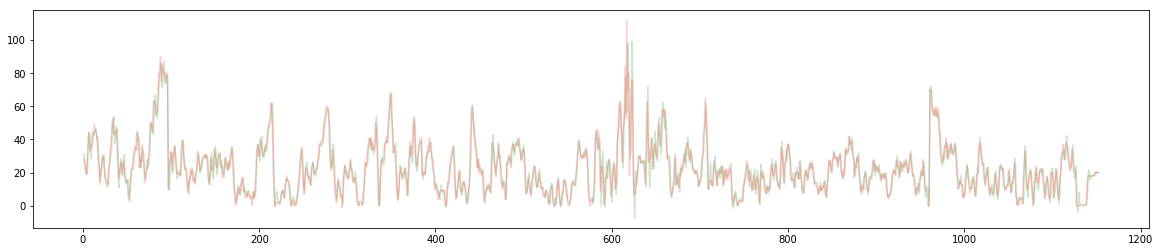

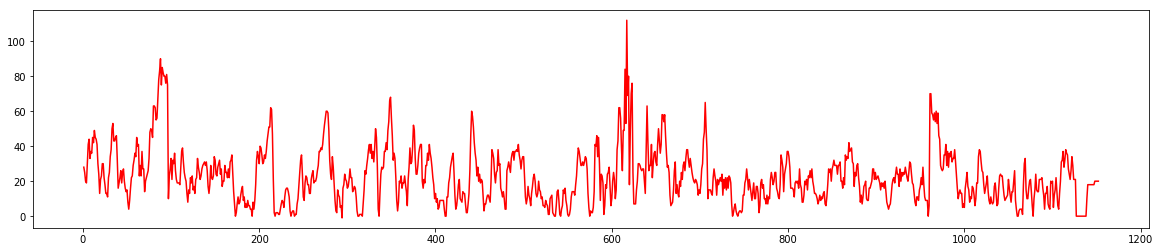

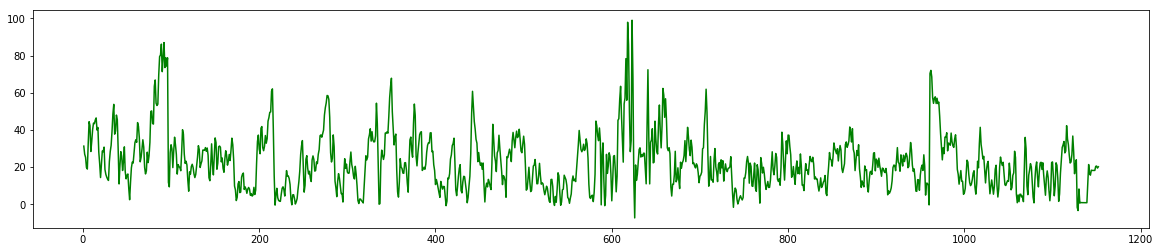

In [197]:
# plt.plot(test_errors)

x = [i for i in range(1, len(test_predictions) + 1)]

plt.figure(figsize=(20,4))
plt.plot(x, test_predictions, 'g', x, test_output, 'r', alpha=0.2)

plt.figure(figsize=(20,4))
plt.plot(x, test_output, 'r')

plt.figure(figsize=(20,4))
plt.plot(x, test_predictions, 'g')

In [199]:
print(weights)

[-0.0359986   0.40708025 -0.59976583  0.07796411  1.11630028  0.81767872]


## Best model for submission

In [170]:
# Remember to run model and get weights before running this!!!

test_AMB_TEMP = []
test_CH4 = []
test_CO = []
test_NMHC = []
test_NO = []
test_NO2 = []
test_NOx = []
test_O3 = []
test_PM10 = []
test_PM2_5 = []
test_RAINFALL = []
test_RH = []
test_SO2 = []
test_THC = []
test_WD_HR = []
test_WIND_DIREC = []
test_WIND_SPEED = []
test_WS_HR = []

window = 5

with open('test.csv', 'rt', encoding='big5') as infile:
    with open('submission.csv', 'wt') as outfile:
        test_reader = csv.reader(infile, delimiter='\n')
        test_writer = csv.writer(outfile, delimiter=',', quotechar='|', quoting=csv.QUOTE_MINIMAL)
        test_writer.writerow(['id','value'])
        counter = 0
        for idx, row in enumerate(test_reader):
            
            row = row[0].split(',')
            # print('row', row)
            values = row[2:] # remove id, category
            values = [float(i) if i != 'NR' else 0.0 for i in values]
            
            category_num = idx % 18
            if category_num == 0:
                test_AMB_TEMP = values
            elif category_num == 1:
                test_CH4 = values
            elif category_num == 2:
                test_CO = values
            elif category_num == 3:
                test_NMHC = values
            elif category_num == 4:
                test_NO = values
            elif category_num == 5:
                test_NO2 = values
            elif category_num == 6:
                test_NOx = values
            elif category_num == 7:
                test_O3 = values
            elif category_num == 8:
                test_PM10 = values
            elif category_num == 9:
                test_PM2_5 = values
            elif category_num == 10:
                test_RAINFALL = values
            elif category_num == 11:
                test_RH = values
            elif category_num == 12:
                test_SO2 = values
            elif category_num == 13:
                test_THC = values
            elif category_num == 14:
                test_WD_HR = values
            elif category_num == 15:
                test_WIND_DIREC = values
            elif category_num == 16:
                test_WIND_SPEED = values
            elif category_num == 17:
                test_WS_HR = values
                
                # finished reading an id, can go to work now
                features = np.array(test_PM2_5[-window:])
                test_PM25_squared = 0.01* (features ** 2)
                # PM25_squared_last = PM25_squared[-1]
                test_PM25_deltas = np.array([(test_PM2_5[-i] - test_PM2_5[-i-1]) for i in range(1, window)])
                test_PM25_deltas_squared = 0.01 * (test_PM25_deltas ** 2)
                # PM25_delta_last = PM2_5[idx+window-1] - PM2_5[idx+window-2]
                # test_rain_deltas = np.array([(test_RAINFALL[-i] - test_RAINFALL[-i-1]) for i in range(1, window)])
                # test_rain_delta_middle = test_rain_deltas[1]
                # PM25_PM10 = np.sqrt(abs(features * np.array(PM10[idx: idx+window])))
                rain = np.array(test_RAINFALL[-window:])

                # features = np.append(features, test_PM25_deltas)
                # features = np.append(features, test_PM25_deltas_squared)
                # features = np.append(features, test_rain_delta_middle)
                # features = np.append(features, test_PM25_squared)
                features = np.append(features, rain)
                features = np.append(features, 1.0)
                test_input.append(features)

                prediction = sum(np.multiply(weights, features))
                
                if prediction < 0:
                    prediction = 0.0
                
                test_writer.writerow(['id_' + str(counter),prediction])
                counter += 1

print('done!')    

done!


##### PM2.5

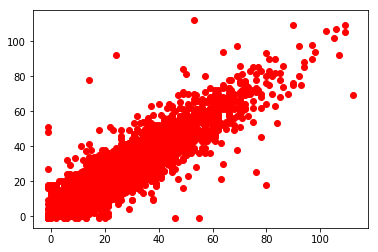

In [145]:
x = []
y = []
for idx in range(0, len(PM2_5)-window-1):
    # window_vals = PM2_5[idx: idx + window]
    window_val = PM2_5[idx + window - 1]
    # print(window_vals)
    # x.append(sum(window_vals) / len(window_vals))
    x.append(window_val)
    y.append(PM2_5[idx+window])
    
plt.plot(x, y, 'ro')

##### RAINFALL

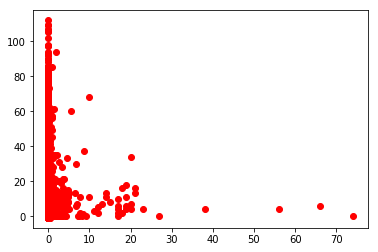

In [156]:
length = len(PM2_5)
howfar = 1
plt.plot(RAINFALL[0:length-howfar], PM2_5[howfar:length], 'ro')

#### PM10

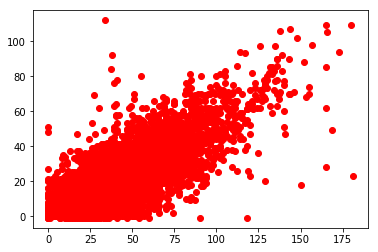

In [159]:
length = len(PM2_5)
howfar = 1
plt.plot(PM10[0:length-howfar], PM2_5[howfar:length], 'ro')

#### AMB_TEMP 

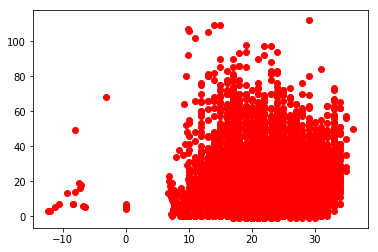

In [169]:
length = len(PM2_5)
howfar = 1
plt.plot(AMB_TEMP[0:length-howfar], PM2_5[howfar:length], 'ro')

#### WIND_SPEED

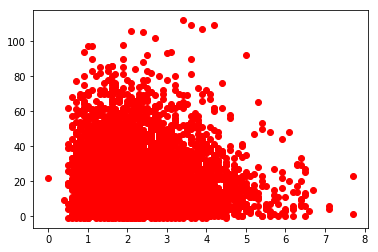

In [170]:
length = len(PM2_5)
howfar = 1
plt.plot(WIND_SPEED[0:length-howfar], PM2_5[howfar:length], 'ro')

#### WIND_DIREC

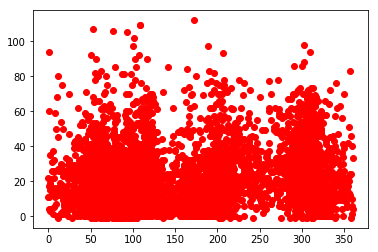

In [172]:
length = len(PM2_5)
howfar = 1
plt.plot(WIND_DIREC[0:length-howfar], PM2_5[howfar:length], 'ro')

#### WS_HR

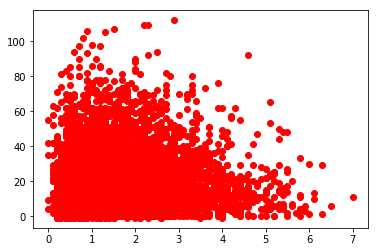

In [173]:
length = len(PM2_5)
howfar = 1
plt.plot(WS_HR[0:length-howfar], PM2_5[howfar:length], 'ro')